## Ejercicio 1

Primero probamos algunas variantes en la notebook y despues pasamos al script...

In [1]:
import argparse
import pandas
import numpy
#
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import optimizers, regularizers
from keras.utils import to_categorical
#
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import dill as pickle
import datetime
from util import print_plot_classification_report_keras


Using TensorFlow backend.


In [2]:
# definimos una clase en el espiritu de read_args, para probar en la nb
class model_params(object):
    def __init__(self,dictIn):
        for k in dictIn:
            self.__setattr__(k,dictIn[k])
            
def load_dataset(tfid_params):
    dataset = load_files('dataset/txt_sentoken', shuffle=False)

    X_train, X_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=42)

    print('Training samples {}, test_samples {}'.format(
        len(X_train), len(X_test)))
    
    # TODO 1: Apply the Tfidf vectorizer to create input matrix
    if tfid_params:
        params=tfid_params
    else:
        params={'binary': True, 'ngram_range': (1, 1),'min_df': 1,'max_df':1.0}
        
    vect=TfidfVectorizer()
    vect.set_params(**params)
    X_train=vect.fit_transform(X_train)
    X_test=vect.transform(X_test)
    

    return X_train, X_test, y_train, y_test


def create_model(args,optimizer=optimizers.Adagrad(lr=0.001, decay=0.0001)):
	# create model
    #
    model = Sequential()
    model.add(Dense(args.num_units,  input_shape=(args.input_num,), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=args.reg_l1, l2=args.reg_l2)))
    model.add(Dropout(args.dropout))
    model.add(Dense(args.num_units, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=args.reg_l1, l2=args.reg_l2)))
    model.add(Dropout(args.dropout))
    model.add(Dense(2, activation=args.act_func_last_layer, kernel_regularizer=regularizers.l1_l2(l1=args.reg_l1, l2=args.reg_l2)))
	# Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def save_to_pickle(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

def get_keras_model_history_params(model,params_list_tuple):
    dOut={}
    dOut['history']=model.history.history
    dOut['model_params']=model.history.params
    for k,y in params_list_tuple:
        dOut[k]=y
    return dOut

def get_time_str():
    return datetime.datetime.now().strftime('%Y%m%d%H%M%S')

#### Dataset

Cargamos el dataset y convertimos a categoricas los target


In [3]:
#
vec_dict={'binary': True, 'ngram_range': (1, 1),'min_df': 1,'max_df':1.0}
#
X_train, X_test, y_train, y_test=load_dataset(vec_dict)
y_train_c = to_categorical(y_train,None)
y_test_c_ = to_categorical(y_test,None)

Training samples 1500, test_samples 500


### Caso: Sin regularizacion  - softmax

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6918 - acc: 0.5447 - val_loss: 0.6888 - val_acc: 0.5900
Epoch 2/12
1500/1500 [==============================] - 1s 739us/step - loss: 0.6765 - acc: 0.7547 - val_loss: 0.6775 - val_acc: 0.6800
Epoch 3/12
1500/1500 [==============================] - 1s 750us/step - loss: 0.6516 - acc: 0.8587 - val_loss: 0.6626 - val_acc: 0.7940
Epoch 4/12
1500/1500 [==============================] - 1s 748us/step - loss: 0.6233 - acc: 0.9000 - val_loss: 0.6472 - val_acc: 0.7960
Epoch 5/12
1500/1500 [==============================] - 1s 742us/step - loss: 0.5892 - acc: 0.9453 - val_loss: 0.6300 - val_acc: 0.8160
Epoch 6/12
1500/1500 [==============================] - 1s 743us/step - loss: 0.5584 - acc: 0.9507 - val_loss: 0.6138 - val_acc: 0.8180
Epoch 7/12
1500/1500 [==============================] - 1s 738us/step - loss: 0.5293 - acc: 0.9633 - val_loss: 0.5979 - val_acc: 0.8200
Epo

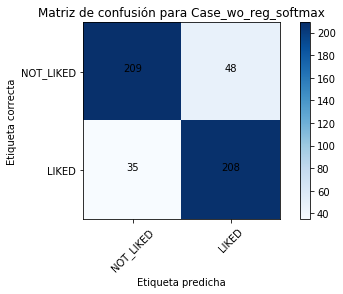

In [4]:
CASE='Case_wo_reg_softmax'
params_model_dict={'num_units':100,'dropout':0.5,'reg_l1':0.0,'reg_l2':0.0,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

### Caso: Sin regularizacion  - sigmoid

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 1s 990us/step - loss: 0.6923 - acc: 0.5407 - val_loss: 0.6905 - val_acc: 0.7240
Epoch 2/12
1500/1500 [==============================] - 1s 746us/step - loss: 0.6853 - acc: 0.7167 - val_loss: 0.6856 - val_acc: 0.7420
Epoch 3/12
1500/1500 [==============================] - 1s 746us/step - loss: 0.6751 - acc: 0.8077 - val_loss: 0.6796 - val_acc: 0.7900
Epoch 4/12
1500/1500 [==============================] - 1s 755us/step - loss: 0.6627 - acc: 0.8593 - val_loss: 0.6731 - val_acc: 0.8000
Epoch 5/12
1500/1500 [==============================] - 1s 758us/step - loss: 0.6479 - acc: 0.8867 - val_loss: 0.6659 - val_acc: 0.8230
Epoch 6/12
1500/1500 [==============================] - 1s 789us/step - loss: 0.6343 - acc: 0.9137 - val_loss: 0.6580 - val_acc: 0.8250
Epoch 7/12
1500/1500 [==============================] - 1s 748us/step - loss: 0.6156 - acc: 0.9397 - val_loss: 0.6498 - val_acc: 0.8260
E

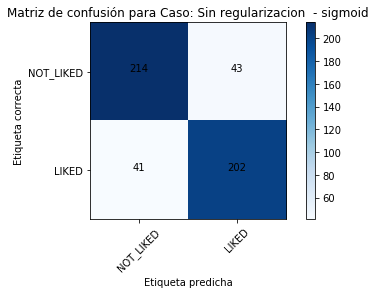

In [5]:
CASE='Caso: Sin regularizacion  - sigmoid'
params_model_dict={'num_units':100,'dropout':0.5,'reg_l1':0.0,'reg_l2':0.0,'act_func_last_layer':'sigmoid',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

Para la misma configuracion de parametros (con excepcion de la funcion de activacion de la capa final) 'softmax' parece tener un mejor valor predictivo.

### Caso: Dropout + regularizacion L2

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 2s 1ms/step - loss: 2.7490 - acc: 0.5413 - val_loss: 2.1993 - val_acc: 0.7440
Epoch 2/12
1500/1500 [==============================] - 1s 833us/step - loss: 2.0268 - acc: 0.7227 - val_loss: 1.8720 - val_acc: 0.6800
Epoch 3/12
1500/1500 [==============================] - 1s 825us/step - loss: 1.7923 - acc: 0.7747 - val_loss: 1.7202 - val_acc: 0.8220
Epoch 4/12
1500/1500 [==============================] - 1s 866us/step - loss: 1.6720 - acc: 0.8627 - val_loss: 1.6339 - val_acc: 0.8300
Epoch 5/12
1500/1500 [==============================] - 1s 849us/step - loss: 1.5999 - acc: 0.8793 - val_loss: 1.5785 - val_acc: 0.8260
Epoch 6/12
1500/1500 [==============================] - 1s 829us/step - loss: 1.5505 - acc: 0.9080 - val_loss: 1.5396 - val_acc: 0.8260
Epoch 7/12
1500/1500 [==============================] - 1s 834us/step - loss: 1.5145 - acc: 0.9273 - val_loss: 1.5101 - val_acc: 0.8280
Epo

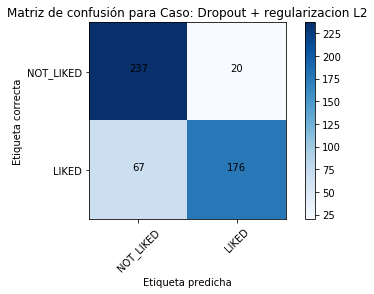

In [6]:
CASE='Caso: Dropout + regularizacion L2'
params_model_dict={'num_units':100,'dropout':0.5,'reg_l1':0.0,'reg_l2':0.01,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

### Caso: Dropout + regularizacion L1

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 2s 1ms/step - loss: 150.4577 - acc: 0.5007 - val_loss: 90.2212 - val_acc: 0.4860
Epoch 2/12
1500/1500 [==============================] - 1s 904us/step - loss: 66.5493 - acc: 0.5047 - val_loss: 43.8621 - val_acc: 0.4860
Epoch 3/12
1500/1500 [==============================] - 1s 853us/step - loss: 32.6117 - acc: 0.4893 - val_loss: 21.6964 - val_acc: 0.4860
Epoch 4/12
1500/1500 [==============================] - 1s 844us/step - loss: 16.6555 - acc: 0.4987 - val_loss: 12.2027 - val_acc: 0.4860
Epoch 5/12
1500/1500 [==============================] - 1s 871us/step - loss: 11.0248 - acc: 0.5087 - val_loss: 10.4363 - val_acc: 0.4860
Epoch 6/12
1500/1500 [==============================] - 1s 866us/step - loss: 10.3122 - acc: 0.5073 - val_loss: 10.1153 - val_acc: 0.4860
Epoch 7/12
1500/1500 [==============================] - 1s 846us/step - loss: 10.0158 - acc: 0.5093 - val_loss: 9.8484 - val_a

/home/felix/anaconda3/envs/deeplearning/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


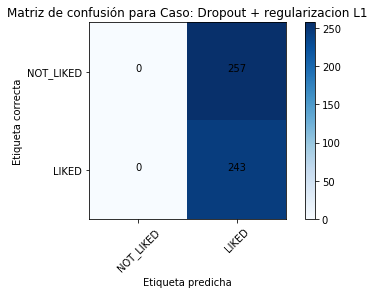

In [7]:
CASE='Caso: Dropout + regularizacion L1'
params_model_dict={'num_units':100,'dropout':0.5,'reg_l1':0.01,'reg_l2':0.00,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

### Caso: DropOut==0.1

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6873 - acc: 0.6027 - val_loss: 0.6762 - val_acc: 0.8180
Epoch 2/12
1500/1500 [==============================] - 1s 647us/step - loss: 0.6405 - acc: 0.9353 - val_loss: 0.6512 - val_acc: 0.8060
Epoch 3/12
1500/1500 [==============================] - 1s 627us/step - loss: 0.5823 - acc: 0.9760 - val_loss: 0.6291 - val_acc: 0.7660
Epoch 4/12
1500/1500 [==============================] - 1s 633us/step - loss: 0.5271 - acc: 0.9907 - val_loss: 0.6058 - val_acc: 0.8080
Epoch 5/12
1500/1500 [==============================] - 1s 632us/step - loss: 0.4747 - acc: 0.9947 - val_loss: 0.5828 - val_acc: 0.8200
Epoch 6/12
1500/1500 [==============================] - 1s 628us/step - loss: 0.4253 - acc: 0.9967 - val_loss: 0.5642 - val_acc: 0.8120
Epoch 7/12
1500/1500 [==============================] - 1s 629us/step - loss: 0.3809 - acc: 0.9973 - val_loss: 0.5464 - val_acc: 0.8180
Epo

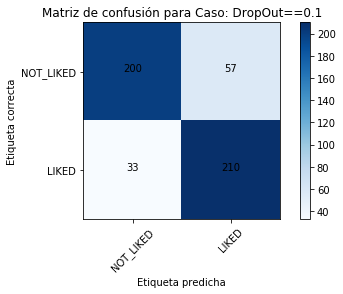

In [8]:
CASE='Caso: DropOut==0.1'
#
params_model_dict={'num_units':100,'dropout':0.1,'reg_l1':0.00,'reg_l2':0.00,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

### Caso: num_units==1000

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6829 - acc: 0.6000 - val_loss: 0.6557 - val_acc: 0.8100
Epoch 2/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5298 - acc: 0.9427 - val_loss: 0.5030 - val_acc: 0.8340
Epoch 3/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2533 - acc: 0.9867 - val_loss: 0.4051 - val_acc: 0.8460
Epoch 4/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0993 - acc: 0.9987 - val_loss: 0.3691 - val_acc: 0.8520
Epoch 5/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0489 - acc: 0.9993 - val_loss: 0.3679 - val_acc: 0.8360
Epoch 6/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0278 - acc: 1.0000 - val_loss: 0.3474 - val_acc: 0.8520
Epoch 7/12
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0183 - acc: 1.0000 - val_loss: 0.3444 - val_acc: 0.8520
Epoch 8/12
1500

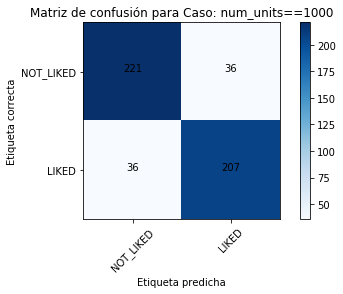

In [9]:
CASE='Caso: num_units==1000'
params_model_dict={'num_units':1000,'dropout':0.5,'reg_l1':0.00,'reg_l2':0.00,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

Parece estar realizando overfitting en training (observado tanto en acc como en loss~0).

#### Caso Drop out + regularizacion

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 2s 1ms/step - loss: 155.2506 - acc: 0.4860 - val_loss: 96.0243 - val_acc: 0.4920
Epoch 2/12
1500/1500 [==============================] - 1s 709us/step - loss: 72.3390 - acc: 0.5107 - val_loss: 49.3934 - val_acc: 0.4860
Epoch 3/12
1500/1500 [==============================] - 1s 755us/step - loss: 37.6514 - acc: 0.5093 - val_loss: 26.0077 - val_acc: 0.4860
Epoch 4/12
1500/1500 [==============================] - 1s 759us/step - loss: 20.1980 - acc: 0.5047 - val_loss: 14.7205 - val_acc: 0.4860
Epoch 5/12
1500/1500 [==============================] - 1s 722us/step - loss: 12.6109 - acc: 0.5047 - val_loss: 11.1470 - val_acc: 0.4860
Epoch 6/12
1500/1500 [==============================] - 1s 716us/step - loss: 11.0155 - acc: 0.5047 - val_loss: 10.8214 - val_acc: 0.4860
Epoch 7/12
1500/1500 [==============================] - 1s 701us/step - loss: 10.7140 - acc: 0.5047 - val_loss: 10.5490 - val_

/home/felix/anaconda3/envs/deeplearning/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


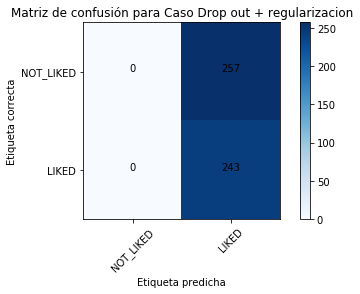

In [10]:
CASE='Caso Drop out + regularizacion'
params_model_dict={'num_units':100,'dropout':0.3,'reg_l1':0.01,'reg_l2':0.01,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

Drop Out + regularizacion parece imponer mucha penalidad y el sistema basicamente es como lanzar una moneda

#### Caso Dropout==0 + Regularizacion

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 2s 1ms/step - loss: 2.4515 - acc: 0.5633 - val_loss: 1.8308 - val_acc: 0.6100
Epoch 2/12
1500/1500 [==============================] - 1s 672us/step - loss: 1.5830 - acc: 0.7893 - val_loss: 1.3472 - val_acc: 0.7500
Epoch 3/12
1500/1500 [==============================] - 1s 667us/step - loss: 1.2170 - acc: 0.8947 - val_loss: 1.0963 - val_acc: 0.8260
Epoch 4/12
1500/1500 [==============================] - 1s 673us/step - loss: 1.0209 - acc: 0.9187 - val_loss: 0.9611 - val_acc: 0.7940
Epoch 5/12
1500/1500 [==============================] - 1s 670us/step - loss: 0.9181 - acc: 0.9173 - val_loss: 0.8957 - val_acc: 0.7860
Epoch 6/12
1500/1500 [==============================] - 1s 670us/step - loss: 0.8741 - acc: 0.9127 - val_loss: 0.8749 - val_acc: 0.8320
Epoch 7/12
1500/1500 [==============================] - 1s 677us/step - loss: 0.8604 - acc: 0.9327 - val_loss: 0.8666 - val_acc: 0.8200
Epo

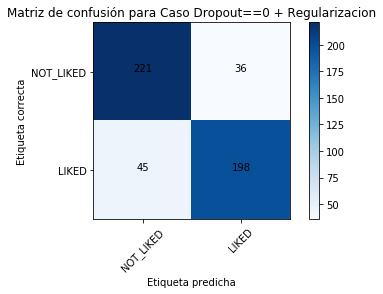

In [11]:
CASE='Caso Dropout==0 + Regularizacion'
params_model_dict={'num_units':100,'dropout':0.0,'reg_l1':0.0001,'reg_l2':0.001,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

Mejora (en terminos de acc) respecto a tener dropout.

#### Caso: num_units==20 + regularizacion==0

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 1s 551us/step - loss: 0.6914 - acc: 0.5107 - val_loss: 0.6887 - val_acc: 0.5380
Epoch 2/12
1500/1500 [==============================] - 0s 256us/step - loss: 0.6781 - acc: 0.6747 - val_loss: 0.6833 - val_acc: 0.5460
Epoch 3/12
1500/1500 [==============================] - 0s 262us/step - loss: 0.6648 - acc: 0.8327 - val_loss: 0.6785 - val_acc: 0.6060
Epoch 4/12
1500/1500 [==============================] - 0s 254us/step - loss: 0.6530 - acc: 0.9127 - val_loss: 0.6744 - val_acc: 0.6280
Epoch 5/12
1500/1500 [==============================] - 0s 253us/step - loss: 0.6421 - acc: 0.9347 - val_loss: 0.6703 - val_acc: 0.6880
Epoch 6/12
1500/1500 [==============================] - 0s 265us/step - loss: 0.6320 - acc: 0.9600 - val_loss: 0.6670 - val_acc: 0.6780
Epoch 7/12
1500/1500 [==============================] - 0s 260us/step - loss: 0.6226 - acc: 0.9687 - val_loss: 0.6637 - val_acc: 0.6880
E

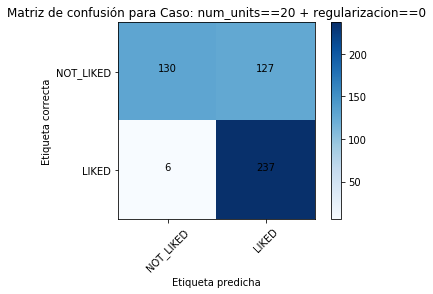

In [12]:
CASE='Caso: num_units==20 + regularizacion==0'
params_model_dict={'num_units':20,'dropout':0.0,'reg_l1':0.00,'reg_l2':0.00,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

#### Caso: num_units==20 + regularizacion L2

Train on 1500 samples, validate on 500 samples
Epoch 1/12
1500/1500 [==============================] - 1s 589us/step - loss: 0.6957 - acc: 0.6373 - val_loss: 0.6902 - val_acc: 0.7100
Epoch 2/12
1500/1500 [==============================] - 1s 445us/step - loss: 0.6730 - acc: 0.9367 - val_loss: 0.6806 - val_acc: 0.7920
Epoch 3/12
1500/1500 [==============================] - 1s 446us/step - loss: 0.6519 - acc: 0.9793 - val_loss: 0.6734 - val_acc: 0.8180
Epoch 4/12
1500/1500 [==============================] - 1s 444us/step - loss: 0.6348 - acc: 0.9873 - val_loss: 0.6674 - val_acc: 0.8180
Epoch 5/12
1500/1500 [==============================] - 1s 465us/step - loss: 0.6196 - acc: 0.9933 - val_loss: 0.6622 - val_acc: 0.8100
Epoch 6/12
1500/1500 [==============================] - 1s 462us/step - loss: 0.6061 - acc: 0.9953 - val_loss: 0.6572 - val_acc: 0.8240
Epoch 7/12
1500/1500 [==============================] - 1s 448us/step - loss: 0.5936 - acc: 0.9973 - val_loss: 0.6529 - val_acc: 0.8180
E

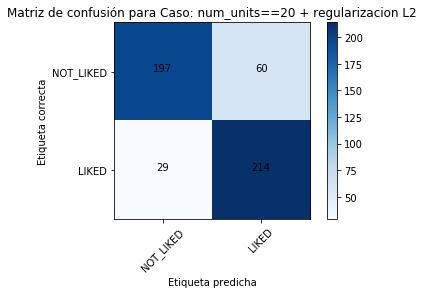

In [13]:
CASE='Caso: num_units==20 + regularizacion L2'
params_model_dict={'num_units':20,'dropout':0.0,'reg_l1':0.00,'reg_l2':0.0001,'act_func_last_layer':'softmax',
       'experiment_name':None,'input_num':100,
       'batch_size':128, 'epochs':12}
#
params_=model_params(params_model_dict)
#
params_.input_num=X_train.shape[1]
model=create_model(args=params_)

#
model.fit(X_train, y_train_c, 
          batch_size=params_.batch_size,
          epochs=params_.epochs,
          validation_data=(X_test, y_test_c_), verbose=1);
#
print_plot_classification_report_keras(model,X_test,y_test,CASE,plotFlag=True,classes_list=['NOT_LIKED','LIKED'])

Vemos que, incrementar ligeramente la regularizacion L2 mejora el accuracy de validacion

In [18]:
# Ejemplo de salvado de los parametros del modelo
tosave=get_keras_model_history_params(model,[('params_model_dict',params_model_dict),('vec_dict',vec_dict)])
save_to_pickle(tosave,'params_'+get_time_str())